In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data set to python environment

In [3]:
df = pd.read_csv(r"C:\Users\arund\Downloads\titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2) Make passenger Id as index column

In [4]:
df = pd.read_csv(r"C:\Users\arund\Downloads\titanic_dataset.csv",index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3) Checking basic details of dataset

In [5]:
df.shape

(891, 11)

In [6]:
df.size

9801

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

Three columns 'Age','Embarked' and 'Cabin' has null values.'Age' and 'Embarked' has less number of missing values , so we have to impute them using different techniques. As there are a lot of missing values in the column 'Cabin', we can remove it from the  data.

1) Handling missing values in the column 'Age'

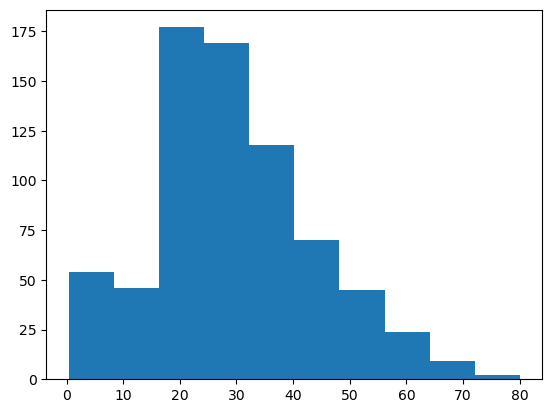

In [17]:
plt.hist(df["Age"])
plt.show()

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

2) Handling missing values in the column 'Embarked'

In [21]:
# Map 'Embarked' to numerical values

df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2.0


In [90]:
df['Embarked'].value_counts()

Embarked
2.0    646
0.0    168
1.0     77
Name: count, dtype: int64

There are 2 null values in the column 'Embarked'. Let's impute them using majority class.
The majority class is '2'. Impute the unkonown values (NaN) using '2'. 

In [24]:
df['Embarked'] = df['Embarked'].fillna(2)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2.0


In [25]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

3) Let's remove the column 'cabin' as it has a lot of missing values.

In [72]:
df1 = df.copy()


In [73]:
df1 = df1.drop('Cabin',axis=1)

In [30]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0


In [31]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset


1) Handling outliers in the column 'Fare'.

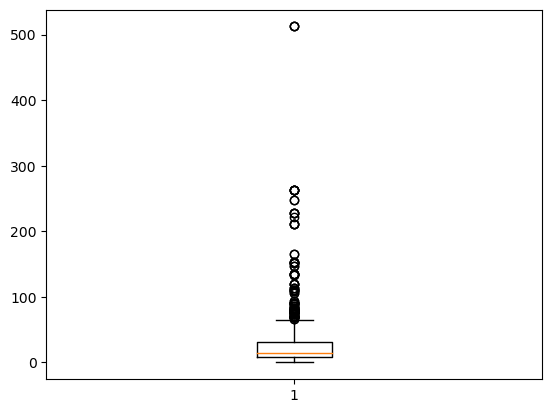

In [33]:
plt.boxplot(df1['Fare'])
plt.show()

In [35]:
Q1 = np.percentile(df1['Fare'],25,method='midpoint')
Q2 = np.percentile(df1['Fare'],50,method='midpoint')
Q3 = np.percentile(df1['Fare'],75,method='midpoint')

In [36]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [37]:
IQR = Q3-Q1
IQR

23.0896

In [38]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -26.724
upper limit is  65.6344


In [40]:
outlier=[]
for x in df1['Fare']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [41]:
df1['Fare'] = df1['Fare'].clip(lower=low_lim , upper=up_lim)

In [44]:
outlier=[]
for x in df1['Fare']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

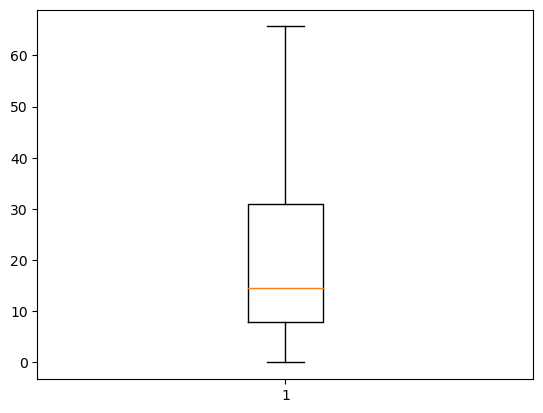

In [45]:
plt.boxplot(df1['Fare'])
plt.show();

2) Handling outliers in the column 'Age'

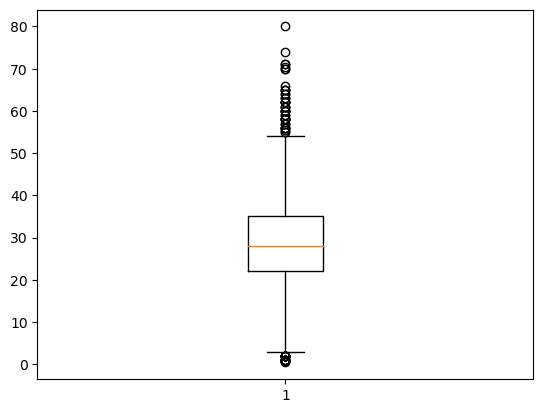

In [46]:
plt.boxplot(df1['Age'])
plt.show()

In [47]:
Q1 = np.percentile(df1['Age'],25,method='midpoint')
Q2 = np.percentile(df1['Age'],50,method='midpoint')
Q3 = np.percentile(df1['Age'],75,method='midpoint')

In [48]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  22.0
Q2 is  28.0
Q3 is  35.0


In [49]:
IQR = Q3-Q1
IQR

13.0

In [50]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  2.5
upper limit is  54.5


In [51]:
outlier=[]
for x in df1['Age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [52]:
df1['Age'] = df1['Age'].clip(lower=low_lim , upper=up_lim)

In [53]:
outlier=[]
for x in df1['Age']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

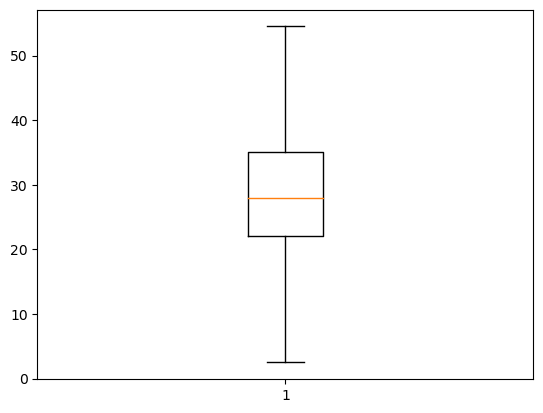

In [54]:
plt.boxplot(df1['Age'])
plt.show();

3) Handling outliers in the column 'SibSp'.

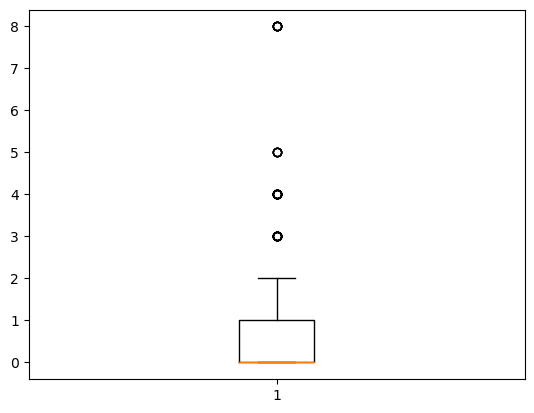

In [55]:
plt.boxplot(df1['SibSp'])
plt.show()

In [56]:
Q1 = np.percentile(df1['SibSp'],25,method='midpoint')
Q2 = np.percentile(df1['SibSp'],50,method='midpoint')
Q3 = np.percentile(df1['SibSp'],75,method='midpoint')

In [57]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  0.0
Q2 is  0.0
Q3 is  1.0


In [58]:
IQR = Q3-Q1
IQR

1.0

In [59]:
low_lim = Q1-IQR*1.5
up_lim = Q3+1.5*IQR

print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -1.5
upper limit is  2.5


In [60]:
outlier=[]
for x in df1['SibSp']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [61]:
df1['SibSp'] = df1['SibSp'].clip(lower=low_lim , upper=up_lim)

In [62]:
outlier=[]
for x in df1['SibSp']:
     if((x > up_lim) or (x < low_lim)):
        outlier.append(x)

outlier

[]

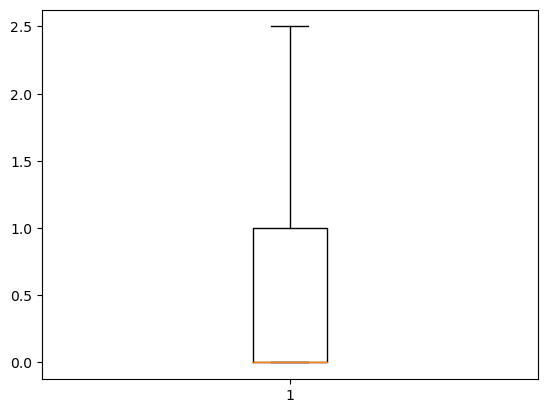

In [63]:
plt.boxplot(df1['SibSp'])
plt.show();

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [74]:
df2 = df1.copy()

In [88]:
# 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.

df2= df1.drop(['Name','Ticket','Survived'],axis=1)

In [86]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,2.0
2,1,female,38.0,1,0,71.2833,0.0
3,3,female,26.0,0,0,7.9250,2.0
4,1,female,35.0,1,0,53.1000,2.0
5,3,male,35.0,0,0,8.0500,2.0


In [77]:
# Mark 'Sex' to numerical values.

df2['Sex'] = df2['Sex'].map({'male':0, 'female':1})

In [78]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,2.0
2,1,1,38.0,1,0,71.2833,0.0
3,3,1,26.0,0,0,7.9250,2.0
4,1,1,35.0,1,0,53.1000,2.0
5,3,0,35.0,0,0,8.0500,2.0


In [79]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()

In [80]:
data_scaled = min_scaler.fit_transform(df2)

In [81]:
data_scaled_new = pd.DataFrame(data_scaled)
data_scaled_new.head(10)

,0,1,2,3,4,5,6
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,1.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,1.0
5,1.0,0.0,0.346569,0.000,0.000000,0.016510,0.5
6,0.0,0.0,0.673285,0.000,0.000000,0.101229,1.0
7,1.0,0.0,0.019854,0.375,0.166667,0.041136,1.0
8,1.0,1.0,0.334004,0.000,0.333333,0.021731,1.0
9,0.5,1.0,0.170646,0.125,0.000000,0.058694,0.0
